In [94]:
%matplotlib inline
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
gpu_data = pd.read_csv('gpu.csv', index_col=0);gpu_data

,benchmark,env,inst,count,time
0,alu,gpu,"v_add_f32 v1, v2, v3",0,0.000003
1,alu,gpu,"v_add_f32 v1, v2, v3",0,0.000003
2,alu,gpu,"v_add_f32 v1, v2, v3",0,0.000003
3,alu,gpu,"v_add_f32 v1, v2, v3",0,0.000003
4,alu,gpu,"v_add_f32 v1, v2, v3",0,0.000003
5,alu,gpu,"v_add_f32 v1, v2, v3",0,0.000003
6,alu,gpu,"v_add_f32 v1, v2, v3",0,0.000003
7,alu,gpu,"v_add_f32 v1, v2, v3",0,0.000003
8,alu,gpu,"v_add_f32 v1, v2, v3",0,0.000003
9,alu,gpu,"v_add_f32 v1, v2, v3",0,0.000003


In [96]:
sim_data = pd.read_csv('sim.csv', index_col=0);sim_data

,benchmark,env,inst,count,time
0,alu,sim,"v_add_f32 v1, v2, v3",0,0.000003
1,alu,sim,"v_add_f32 v1, v2, v3",1,0.000003
2,alu,sim,"v_add_f32 v1, v2, v3",2,0.000003
3,alu,sim,"v_add_f32 v1, v2, v3",3,0.000003
4,alu,sim,"v_add_f32 v1, v2, v3",4,0.000003
5,alu,sim,"v_add_f32 v1, v2, v3",5,0.000003
6,alu,sim,"v_add_f32 v1, v2, v3",6,0.000003
7,alu,sim,"v_add_f32 v1, v2, v3",7,0.000003
8,alu,sim,"v_add_f32 v1, v2, v3",8,0.000003
9,alu,sim,"v_add_f32 v1, v2, v3",9,0.000003


In [97]:
data = gpu_data.groupby(['inst', 'count']).agg(np.mean).reset_index();
data

,inst,count,time
0,"v_add_f32 v1, v2, v3",0,0.000003
1,"v_add_f32 v1, v2, v3",1,0.000003
2,"v_add_f32 v1, v2, v3",2,0.000003
3,"v_add_f32 v1, v2, v3",3,0.000003
4,"v_add_f32 v1, v2, v3",4,0.000003
5,"v_add_f32 v1, v2, v3",5,0.000003
6,"v_add_f32 v1, v2, v3",6,0.000003
7,"v_add_f32 v1, v2, v3",7,0.000003
8,"v_add_f32 v1, v2, v3",8,0.000003
9,"v_add_f32 v1, v2, v3",9,0.000003


In [98]:
full_data = gpu_data.append(sim_data);full_data

,benchmark,env,inst,count,time
0,alu,gpu,"v_add_f32 v1, v2, v3",0,0.000003
1,alu,gpu,"v_add_f32 v1, v2, v3",0,0.000003
2,alu,gpu,"v_add_f32 v1, v2, v3",0,0.000003
3,alu,gpu,"v_add_f32 v1, v2, v3",0,0.000003
4,alu,gpu,"v_add_f32 v1, v2, v3",0,0.000003
5,alu,gpu,"v_add_f32 v1, v2, v3",0,0.000003
6,alu,gpu,"v_add_f32 v1, v2, v3",0,0.000003
7,alu,gpu,"v_add_f32 v1, v2, v3",0,0.000003
8,alu,gpu,"v_add_f32 v1, v2, v3",0,0.000003
9,alu,gpu,"v_add_f32 v1, v2, v3",0,0.000003


(2e-06, 5e-06)

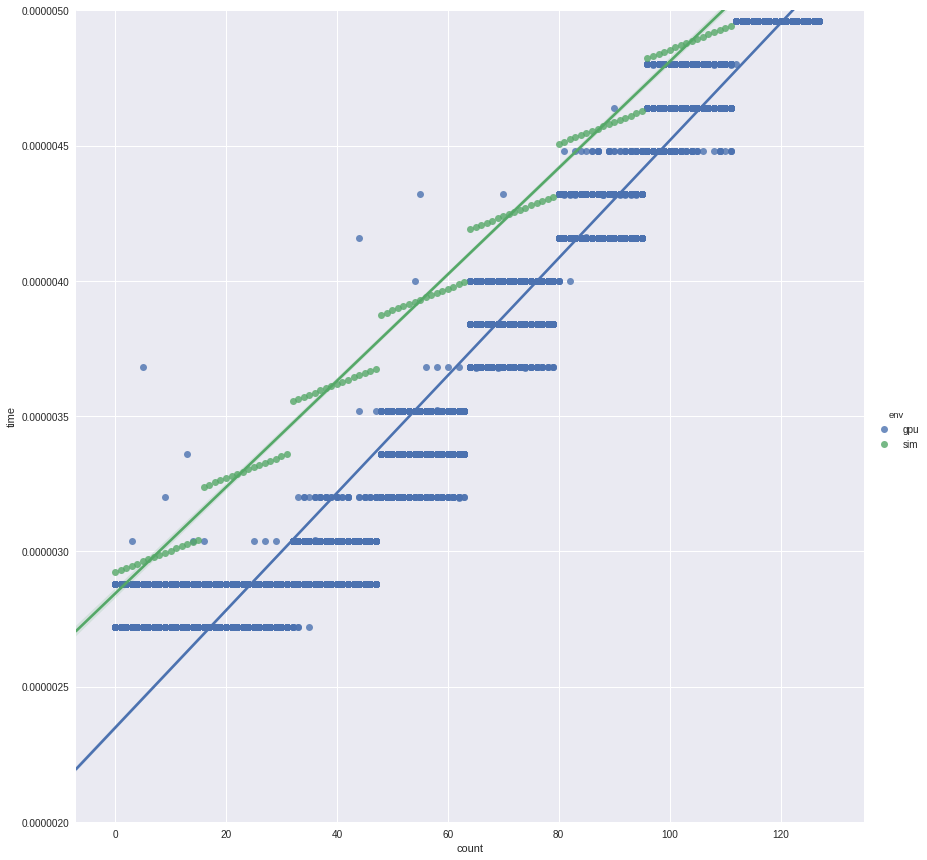

In [99]:
plt.figure(figsize=(15,8))
lm = sns.lmplot('count', 'time', full_data, hue='env', size=12)
lm.axes[0, 0].set_ylim(2e-6, 5e-6)

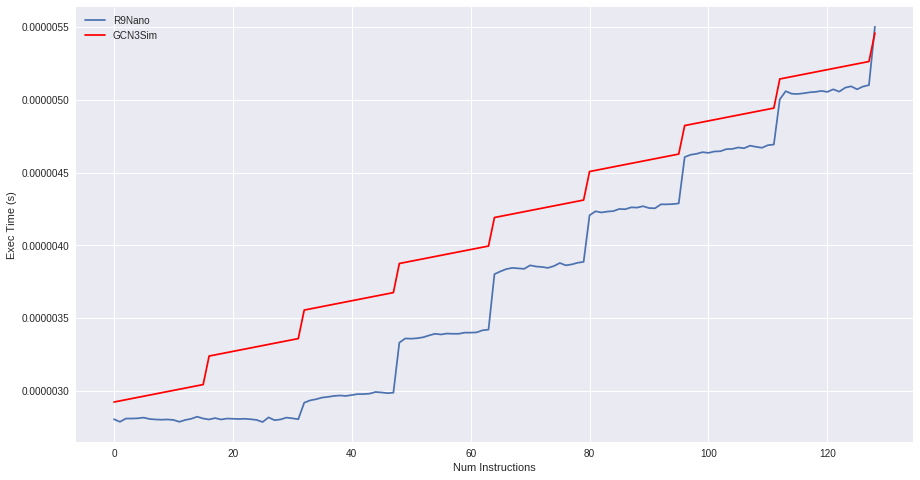

In [100]:
plt.figure(figsize=(15, 8))
plt.plot(data['count'], data['time'], label='R9Nano')
plt.plot(sim_data['count'], sim_data['time'], c='r', label='GCN3Sim')
plt.xlabel('Num Instructions')
plt.ylabel('Exec Time (s)')
plt.legend()
plt.savefig('alu1.pdf')

In [101]:
data_wf = full_data[(full_data['inst']=='v_add_f32 v1, v2, v3') & (full_data['env']=='gpu')];data_wf
result = sm.ols(formula="time ~ count", data=data_wf).fit()
result.params

Intercept    2.347627e-06
count        2.170783e-08
dtype: float64

In [102]:
data_wf = full_data[(full_data['inst']=='v_add_f32 v1, v2, v3') & (full_data['env']=='gpu') & (full_data['count']>=96) & (full_data['count']<112) ];data_wf
result = sm.ols(formula="time ~ count", data=data_wf).fit()
result.params

Intercept    4.127323e-06
count        5.109794e-09
dtype: float64

In [103]:
data_wf = full_data[(full_data['inst']=='v_add_f32 v1, v2, v3') & (full_data['env']=='sim')];data_wf
result = sm.ols(formula="time ~ count", data=data_wf).fit()
result.params

Intercept    2.843869e-06
count        1.966762e-08
dtype: float64

In [104]:
data_wf = full_data[(full_data['inst']=='v_add_f32 v1, v2, v3') & (full_data['env']=='gpu') & (full_data['count']>=32) & (full_data['count']%16==0) ];data_wf
result = sm.ols(formula="time ~ count", data=data_wf).fit()
result.params

Intercept    2.070526e-06
count        2.656391e-08
dtype: float64

## Conclusion
We observe the steping behavior, which is caused by instruction cache miss. If there is no cache miss, `v_add_f32` takes exactly 4 cycles. Assuming the v_add_f32 takes 4 cycles in pipeline, then a cache miss takes about 400 cycles.